In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np

In [2]:
df = pd.read_excel("../data/datosRed.xlsx")

In [3]:
df

,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
1,2019,ID_2,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
2,2019,ID_3,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
3,2019,ID_4,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
4,2019,ID_5,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
...,...,...,...,...,...,...
10379,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10380,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10381,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10382,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA


In [4]:
df.head()

,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
1,2019,ID_2,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
2,2019,ID_3,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
3,2019,ID_4,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
4,2019,ID_5,SERV_1,TAREA_1.1,PRESENCIAL,BAJA


### Datos duplicados

In [5]:
dfDuplicated = df[df.duplicated(keep=False)]

print(f"Se han encontrado {dfDuplicated.shape[0]} representando el {dfDuplicated.shape[0] * 100 / df.shape[0]:.2f} %")

dfDuplicated

Se han encontrado 3797 representando el 36.57 %


,AÑO,PERSONA,TIPO DE SERVICIO,NOMBRE DE LA TAREA,MODALIDAD,COMPLEJIDAD
0,2019,ID_1,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
5,2019,ID_6,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
8,2019,ID_9,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
9,2019,ID_10,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
15,2019,ID_16,SERV_1,TAREA_1.1,PRESENCIAL,BAJA
...,...,...,...,...,...,...
10379,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10380,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10381,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA
10382,2024,ID_4836,SERV_4,TAREA_4.3,PRESENCIAL,BAJA


Se han decido remover ya que no brinda informacion adicional al dataset

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['TIPO DE SERVICIO'].value_counts()

TIPO DE SERVICIO
SERV_2    3441
SERV_1    3260
SERV_4     681
SERV_5     295
SERV_6     119
SERV_7     111
SERV_3      48
Name: count, dtype: int64

/tmp/ipykernel_759462/3958547402.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


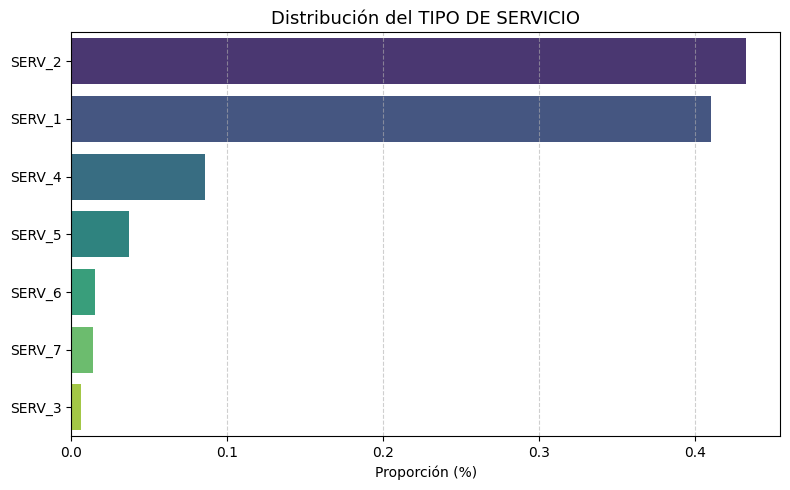

In [26]:
counts = df['TIPO DE SERVICIO'].value_counts(normalize=True).sort_values(ascending=False)
cumulative = counts.cumsum()

top_80 = counts
#otros = counts[cumulative > 0.8].sum()

#top_80['Otros'] = otros
data=top_80.reset_index()
data.columns = ['TIPO DE SERVICIO', 'Proporcion']
data = data.sort_values('Proporcion', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=data,
    y='TIPO DE SERVICIO',
    x='Proporcion',
    palette='viridis'
)
plt.title('Distribución del TIPO DE SERVICIO', fontsize=13)
plt.xlabel('Proporción (%)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipykernel_759462/1343486932.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


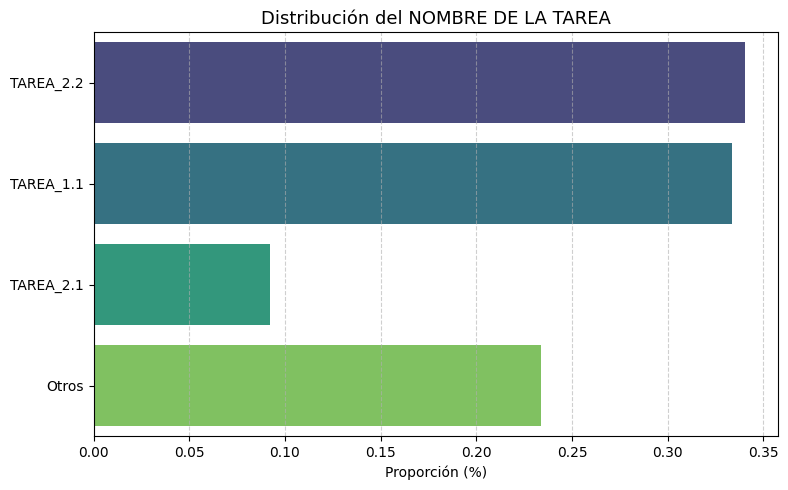

In [24]:
counts = df['NOMBRE DE LA TAREA'].value_counts(normalize=True).sort_values(ascending=False)
cumulative = counts.cumsum()

top_80 = counts[cumulative <= 0.8]
otros = counts[cumulative > 0.8].sum()

top_80['Otros'] = otros
data=top_80.reset_index()
data.columns = ['NOMBRE DE LA TAREA', 'Proporcion']

data["NOMBRE DE LA TAREA"] = pd.Categorical(
    data["NOMBRE DE LA TAREA"],
    categories=[x for x in data["NOMBRE DE LA TAREA"] if x !="Otros"] + ["Otros"]
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=data,
    y='NOMBRE DE LA TAREA',
    x='Proporcion',
    palette='viridis'
)
plt.title('Distribución del NOMBRE DE LA TAREA', fontsize=13)
plt.xlabel('Proporción (%)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

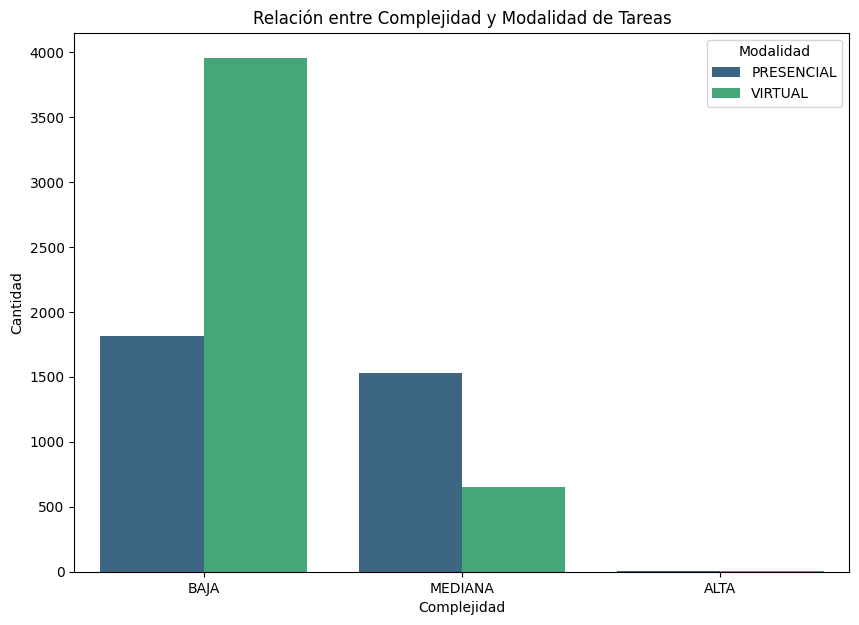

In [27]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='COMPLEJIDAD', hue='MODALIDAD', order=['BAJA', 'MEDIANA', 'ALTA'], palette='viridis')
plt.title('Relación entre Complejidad y Modalidad de Tareas')
plt.xlabel('Complejidad')
plt.ylabel('Cantidad')
plt.legend(title='Modalidad')
plt.show()

In [11]:
B = nx.Graph()

clientes = df['PERSONA'].unique()
servicios = df['TIPO DE SERVICIO'].unique()
B.add_nodes_from(clientes, bipartite=0)
B.add_nodes_from(servicios, bipartite=1)

B.add_edges_from([tuple(x) for x in df[['PERSONA', 'TIPO DE SERVICIO']].values])

G_clientes = bipartite.projected_graph(B, clientes)

In [12]:
print(G_clientes.number_of_nodes())
print(G_clientes.number_of_edges())
print(nx.density(G_clientes))

5090
7189307
0.5550943307360805


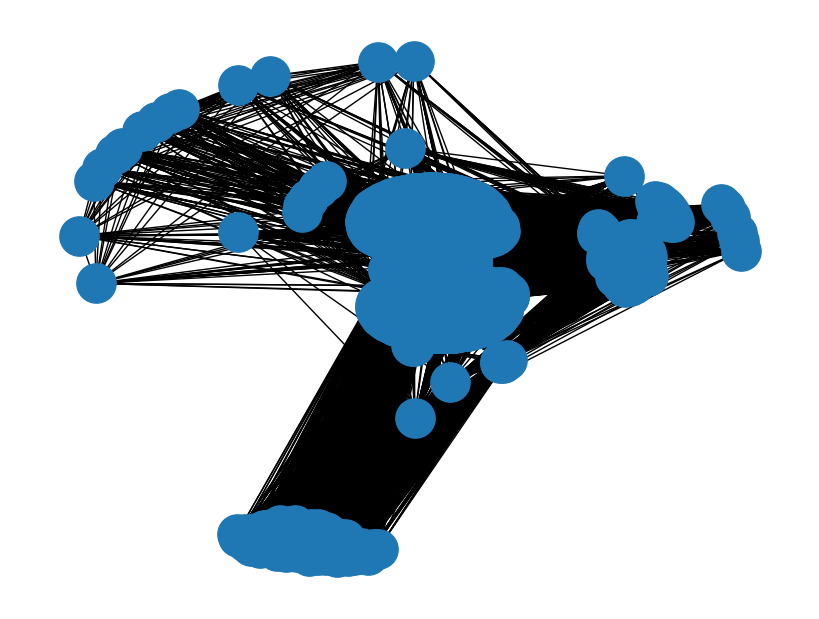

In [13]:
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G_clientes, seed=42, k=0.5)
nx.draw(
    G_clientes, pos, node_size= 800
)
plt.show()

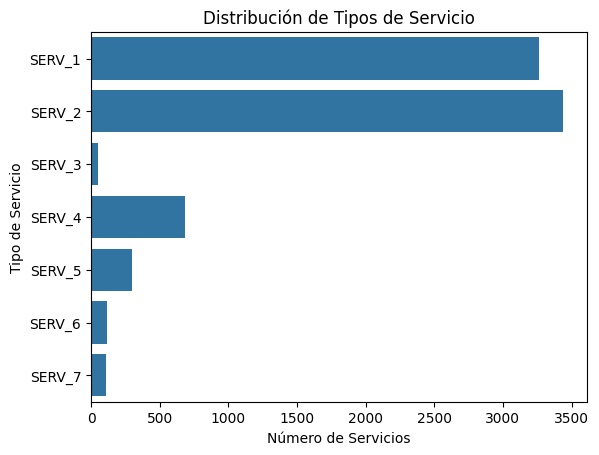

In [14]:
sns.countplot(y='TIPO DE SERVICIO', data=df)
plt.title('Distribución de Tipos de Servicio')
plt.xlabel('Número de Servicios')
plt.ylabel('Tipo de Servicio')
plt.show()

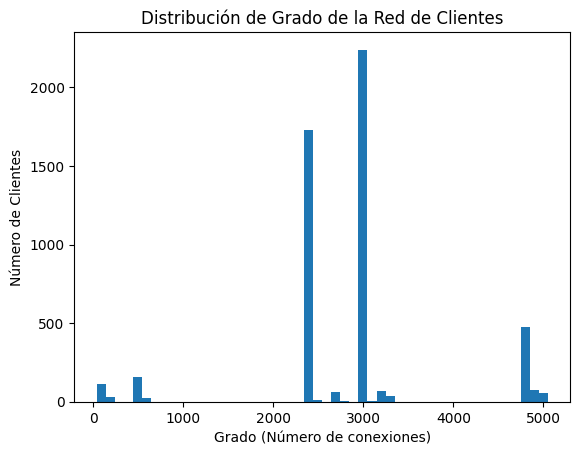

In [15]:
grados = [val for (node, val) in G_clientes.degree()]

plt.hist(grados, bins=50)
plt.title('Distribución de Grado de la Red de Clientes')
plt.xlabel('Grado (Número de conexiones)')
plt.ylabel('Número de Clientes')
plt.show()

In [16]:
num_componentes = nx.number_connected_components(G_clientes)
print(f"La red tiene {num_componentes} componente(s) conectado(s).")

La red tiene 1 componente(s) conectado(s).


In [17]:
def random_node(g):
    return[np.random.choice(g.nodes())]

def dismantle(g, function, **args): #remover nodoss de forma incremetnal y calcular el tamaños de los componentes conectados
    total_nodes=g.number_of_nodes()
    removed_nodes=[]
    components=[]
    while len(g.nodes())>1:
        n=function(g,**args)[0]
        g.remove_node(n)
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)
        comps=list(nx.connected_components(g))
        g_size=0
        if len(comps)>0:
            g_size=max(len(c) for c in comps)/total_nodes
        components.append(g_size)
    return removed_nodes, components


def plot_dismantle(x,y):
    plt.plot(x,y)
    plt.xlabel("removed nodes") 
    plt.ylabel("giant component size")
    plt.show()

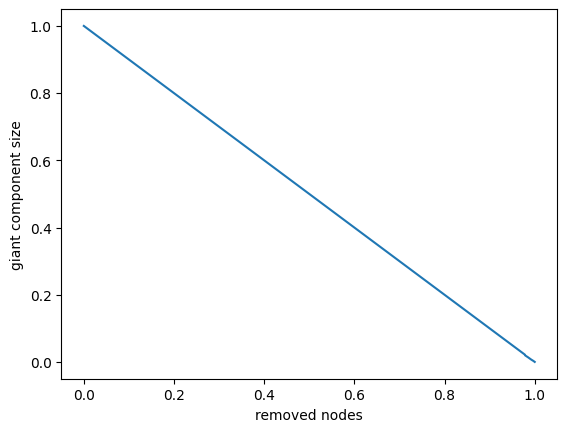

In [18]:
h=G_clientes.copy()
rn , comps=dismantle(h,random_node)
plot_dismantle(rn,comps)

In [19]:
def get_sorted_nodes(g,score,reverse=True): 
    nodes=score(g)
    if isinstance(nodes,dict):
        nodes=[(k,v) for k,v in nodes.items()]
    srt=sorted(nodes,key=lambda k:k[1],reverse=reverse)
    return [x[0] for x in srt]

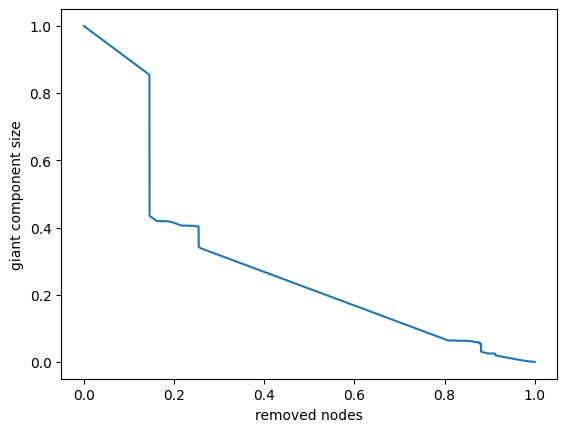

In [20]:
h=G_clientes.copy()
rn , comps=dismantle(h,get_sorted_nodes ,score=nx.degree)
plot_dismantle(rn,comps)